<a href="https://colab.research.google.com/github/AnestisZotos/Data-Mining-and-Visualizations-MRD/blob/main/MRD_Data_mining_and_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import string
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import hamming





In [3]:
applications_df = pd.read_excel('./mrd applications 2023 on site.xlsx')
applications_df.head()

,Φύλο,Τρόπος,Team registration,Ημ. Γέν.,1η Επιλογή,2η Επιλογή,3η Επιλογή,Όνομα Σχολείου
0,Άρρεν,ΔΙΑ ΖΩΣΗΣ,yes,2008-06-02 00:00:00,Καταπολέμηση της βίας κατά των γυναικών,Συμμετοχή των γυναικών στην πολιτική και δημόσ...,Το δικαίωμα ελευθερίας έκφρασης της γνώμης του...,Γενικό Λύκειο Αμπελώνα
1,Θήλυ,ΔΙΑ ΖΩΣΗΣ,yes,2007-03-26 00:00:00,Απαγόρευση των φυλετικών διακρίσεων,Το δικαίωμα του παιδιού στο ψηφιακό περιβάλλον,Συμμετοχή των γυναικών στην πολιτική και δημόσ...,Γενικό Λύκειο Αμπελώνα
2,Θήλυ,ΔΙΑ ΖΩΣΗΣ,yes,2007-01-26 00:00:00,Καταπολέμηση της βίας κατά των γυναικών,Εξάλειψη των διακρίσεων κατά των γυναικών στον...,Το δικαίωμα στην εργασία,Γενικό Λύκειο Αμπελώνα
3,Άρρεν,ΔΙΑ ΖΩΣΗΣ,yes,2007-08-30 00:00:00,Το δικαίωμα ελευθερίας έκφρασης της γνώμης του...,Το δικαίωμα του παιδιού στο ψηφιακό περιβάλλον,Το δικαίωμα των κοριτσιών και γυναικών στην εκ...,Γενικό Λύκειο Αμπελώνα
4,Θήλυ,ΔΙΑ ΖΩΣΗΣ,yes,2008-07-15 00:00:00,Το δικαίωμα στην υγεία με έμφαση στους εφήβους,Συμμετοχή των γυναικών στην πολιτική και δημόσ...,Το δικαίωμα στην εκπαίδευση,Γενικό Λύκειο Αμπελώνα


# Νέα ενότητα

In [3]:
applications_df.tail()

,Φύλο,Τρόπος,Team registration,Ημ. Γέν.,1η Επιλογή,2η Επιλογή,3η Επιλογή,Όνομα Σχολείου
614,Α,ΔΙΑ ΖΩΣΗΣ,no,2007-09-08 00:00:00,Το δικαίωμα στην εργασία,Συμμετοχή των γυναικών στην πολιτική και δημόσ...,Το δικαίωμα στην εκπαίδευση,Λύκειο Λουτρακιου
615,Θ,ΔΙΑ ΖΩΣΗΣ,no,2006-11-04 00:00:00,Απαγόρευση των φυλετικών διακρίσεων,Συμμετοχή των γυναικών στην πολιτική και δημόσ...,Το δικαίωμα ελευθερίας έκφρασης της γνώμης του...,11ο ΓΕΛ Ηρακλείου
616,Θ,ΔΙΑ ΖΩΣΗΣ,no,01/19/2009,Το δικαίωμα στην ελευθερία της έκφρασης,Το δικαίωμα στην σωματική και ψυχική υγεία,Το δικαίωμα στην εργασία,ΑΡΙΣΤΟΤΕΛΕΙΟ ΕΚΠΑΙΔΕΥΤΗΡΙΟ ΣΕΡΡΩΝ
617,Θ,ΔΙΑ ΖΩΣΗΣ,no,04/26/2009,Εξάλειψη των διακρίσεων κατά των γυναικών στον...,Απαγόρευση των φυλετικών διακρίσεων,Απαγόρευση φυλετικής προπαγάνδας και ρητορικής...,ΑΡΙΣΤΟΤΕΛΕΙΟ ΕΚΠΑΙΔΕΥΤΗΡΙΟ ΣΕΡΡΩΝ
618,Α,ΔΙΑ ΖΩΣΗΣ,no,2006-04-07 00:00:00,Το δικαίωμα στην εργασία,Απαγόρευση των φυλετικών διακρίσεων,Το δικαίωμα ελευθερίας έκφρασης της γνώμης του...,Εκπαιδευτικός Οργανισμός Μεθοδικό Λύκειο


# Νέα ενότητα

In [4]:
applications_df.describe()

,Φύλο,Τρόπος,Team registration,Ημ. Γέν.,1η Επιλογή,2η Επιλογή,3η Επιλογή,Όνομα Σχολείου
count,619,619,619,619,619,619,619,619
unique,5,1,2,522,34,37,36,145
top,Θήλυ,ΔΙΑ ΖΩΣΗΣ,yes,2008-03-18 00:00:00,Καταπολέμηση της βίας κατά των γυναικών,Απαγόρευση των φυλετικών διακρίσεων,Συμμετοχή των γυναικών στην πολιτική και δημόσ...,Ιδιωτικό Γυμνάσιο- Εκπαιδευτήρια Μαντουλίδη
freq,340,619,456,4,116,88,62,61


In [4]:
# data cleaning section
dictionary=applications_df.to_dict()
all_schools=dictionary['Όνομα Σχολείου']
all_genders=dictionary['Φύλο']
all_team_reg=dictionary['Team registration']

data=[]                                                                               #includes all the school names(not unique)-used for clustering
total=[]                                                                              #includes triplets in the form:
                                                                                      #(name_of_school,gender,team) for each participant

for school,gender,team in zip(all_schools.values(),all_genders.values(),all_team_reg.values()):             #!!!if you run the script in pyhton 3.x where x<=6 then you must use OrderedDict
  school=school.strip()                                                               #remove white spaces
  school=school.upper()                                                               #all upper-case

  translator = str.maketrans('', '', string.punctuation+"’")                          #remove punctuation
  school=school.translate(translator)

  school=school.replace("QUOT","")                                                    #remove quot

  translator=str.maketrans({'Ά':'A','Έ':'Ε','Ή':'Η','Ί':'Ι','Ό':'Ο','Ύ':'Υ','Ώ':'Ω'}) #remove intonation
  school=school.translate(translator)

  school=school.replace("ΓΕΝΙΚΟ ΛΥΚΕΙΟ","ΓΕΛ")                                        #convert 'ΓΕΝΙΚΟ ΛΥΚΕΙΟ' to 'ΓΕΛ'

  school=school.replace("ΗΜΕΡΗΣΙΟ","")                                                #remove 'ΗΜΕΡΗΣΙΟ'

  school=school.replace(' ','_')                                                      #replaces empty with '_'

  translator=str.maketrans('AaBbGgDdEeZzHhJjIiCcLlMmNnXxOoPpRrSsTtUuFfQqYyWw',\
                           'ΑΑΒΒΓΓΔΔΕΕΖΖΗΗΘΘΙΙΚΚΛΛΜΜΝΝΞΞΟΟΠΠΡΡΣΣΤΤΥΥΦΦΧΧΨΨΩΩ')        #convert english to greek
  school=school.translate(translator)


  data.append(school)                                                                 #add school to data
  triplet=(school,gender,team)
  total.append(triplet)                                                               #add the triplet to total

  #print(school)
print(total)








[('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Άρρεν', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Άρρεν', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('ΓΕΛ_ΑΜΠΕΛΩΝΑ', 'Θήλυ', 'yes'), ('1Ο_ΓΕΛ_ΚΕΡΑΤΣΙΝΙΟΥ', 'Άρρεν', 'yes'), ('1Ο_ΓΕΛ_ΚΕΡΑΤΣΙΝΙΟΥ', 'Θήλυ', 'yes'), ('1Ο_ΓΕΛ_ΚΕΡΑΤΣΙΝΙΟΥ', 'Θήλυ', 'yes'), ('1Ο_ΓΕΛ_ΚΕΡΑΤΣΙΝΙΟΥ', 'Θήλυ', 'yes'), ('1Ο_ΓΕΛ_ΚΕΡΑΤΣΙΝΙΟΥ', 'Θήλυ', 'yes'), ('1Ο_ΓΕΛ_ΚΕΡΑΤΣΙΝΙΟΥ', 'Άρρεν', 'yes'), ('1Ο_ΓΕΛ_ΚΕΡΑΤΣΙΝΙΟΥ', 'Θήλυ', 'yes'), ('1Ο_ΓΕΛ_ΚΕΡΑΤΣΙΝΙΟΥ', 'Θήλυ', 'yes'), ('1Ο_ΓΕΛ_ΚΕΡΑΤΣΙΝΙΟΥ', 'Θήλυ', 'yes'), ('1Ο_ΓΕΛ_ΚΕΡΑΤΣΙΝΙΟΥ', 'Θήλυ', 'yes'), ('1Ο_ΓΕΛ_ΚΕΡΑΤΣΙΝΙΟΥ', 'Θήλυ', 'yes'), ('1Ο_

In [5]:
#kmeans implementation
def hamming_distance(x, y):
    return sum(c1 != c2 for c1, c2 in zip(x, y))

def calculate_hamming_matrix(data):
    n_samples = len(data)
    hamming_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            dist = hamming(data[i], data[j])
            hamming_matrix[i, j] = dist
            hamming_matrix[j, i] = dist

    return hamming_matrix

def kmeans_hamming(data, k):
    vectorizer = CountVectorizer(analyzer='char', lowercase=False)
    X = vectorizer.fit_transform(data).toarray()

    hamming_matrix = calculate_hamming_matrix(X)

    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(hamming_matrix)

    count=0
    clusters = {}
    for i, label in enumerate(kmeans.labels_):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(data[i])
        count+=1
    print("Total participants:"+str(count))
    return clusters



In [6]:
#Function that searches element in the first position of each tuple of total_list
#and when its found,removes from total_list the tuple that the element
#was in and returns the tuple that the element was in
def searchAndRemoveInTotal(element,total_list):
  for iti in total_list:
    if(iti[0]==element):
      t=iti
      total_list.remove(iti)
      return t






In [7]:
k = 93                                                    #num of clusters
result = kmeans_hamming(data, k)                          #kmeans

all_clusters={}                                           #contains every num of cluster(key) and its content(value)
num_of_stud_in_each_clust={}                              #contains every num of cluster(key) and the number of students in it(value)
num_of_stud_in_each_clust2={}                             #contains every name of school(key) and the number of students in it(value)
counter=0

#-print("Clusters:")
for cluster_id, items in result.items():                  #items is a list that contains name of schools in the same cluster

    temp_list=[]                                          #corresponds to one cluster

    #num_of_stud_in_each_clust[counter+1]=len(items)
    num_of_stud_in_each_clust2[items[0]]=len(items)       #Problem when we select the first name of school that appears in the cluster
                                                          #to represent the whole cluster occurs when the same name of school is stored in
                                                          #2 or more clusters in the first position.For example clust1:[(GEL_A)...],
                                                          #clust2:[(GEL_A)...]... because the dictionary will overwrite the first one
                                                          #Also the clustering will always  have an error
    for i in items:
      trpl=searchAndRemoveInTotal(i,total)
      temp_list.append(trpl)
      all_clusters[counter+1]=temp_list
    counter+=1

#-print(all_clusters)
sum=0
for tempor in num_of_stud_in_each_clust2.values():
  sum+=tempor

print("Number of participants that the final result contains: "+str(sum))

print(num_of_stud_in_each_clust2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total participants:619
Number of participants that the final result contains: 619
{'ΓΕΛ_ΑΜΠΕΛΩΝΑ': 18, '1Ο_ΓΕΛ_ΚΕΡΑΤΣΙΝΙΟΥ': 14, 'ΑΜΕΡΙΚΑΝΙΚΟ_ΚΟΛΛΕΓΙΟ_ΑΝΑΤΟΛΙΑ': 27, 'ΚΟΛΕΓΙΟ_ΔΕΛΑΣΑΛ': 8, 'ΓΥΜΝΑΣΙΟ_ΜΟΥΔΡΟΥ_ΑΡΓΥΡΙΟΣ_ΜΟΣΧΙΔΗΣ': 10, 'ΓΕΛ_ΤΥΡΝΑΒΟΥ': 8, 'ΓΕΛ_Ο_ΑΠΟΣΤΟΛΟΣ_ΠΑΥΛΟΣ': 2, '1Ο_ΓΥΜΝΑΣΙΟ_ΚΑΛΥΒΙΩΝ': 11, '1Ο_ΓΕΛ_ΚΑΛΥΒΙΩΝ': 13, 'ΔΩΔΩΝΑΙΑ_ΕΚΠΑΙΔΕΥΤΗΡΙΑ': 35, 'ΠΡΟΤΥΠΟ_ΕΠΑΛ_ΚΡΥΑΣ_ΒΡΥΣΗΣ': 1, 'ΕΛΛΗΝΙΚΟ_ΚΟΛΛΕΓΙΟ_ΘΕΣΣΑΛΟΝΙΚΗΣ': 7, 'ΓΕΛ_ΜΟΥΔΡΟΥ_ΛΗΜΝΟΥ': 7, '1Ο_ΠΡΟΤΥΠΟ_ΛΥΚΕΙΟ_ΧΑΛΚΙΔΑΣ': 13, 'ΓΕΛ_ΑΡΧΑΝΩΝ': 8, '3Ο_ΓΕΛ_KΟΡΥΔΑΛΛΟΥ': 28, '2_ΓΥΜΝΑΣΙΟ_ΑΡΓΟΣΤΟΛΙΟΥ': 2, 'ΑΡΣΑΚΕΙΟ_ΓΥΜΝΑΣΙΟ_ΘΕΣΣΑΛΟΝΙΚΗΣ': 20, 'ΕΚΠΑΙΔΕΥΤΗΡΙΑ_ΜΑΝΤΟΥΛΙΔΗ': 28, 'ΙΔΙΩΤΙΚΟ_ΓΥΜΝΑΣΙΟ_ΕΚΠΑΙΔΕΥΤΗΡΙΑ_ΜΑΝΤΟΥΛΙΔΗ': 61, 'ΕΛΛΗΝΟΓΑΛΛΙΚΗ_ΣΧΟΛΗ_ΚΑΛΑΜΑΡΙ': 25, 'ΓΕΛ_ΦΙΛΟΘΕΗΣ': 10, 'ΓΥΜΝΑΣΙΟ_ΦΙΛΟΘΕΗΣ': 6, 'ΣΧΟΛΗ_ΙΜ_ΠΑΝΑΓΙΩΤΟΠΟΥΛΟΥ': 22, 'ΚΟΛΛΕΓΙΟ_ΑΘΗΝΩΝ_ΓΥΜΝΑΣΙΟ': 12, 'ΓΥΜΝΑΣΙΟ_ΕΚΠΑΙΔΕΥΤΗΡΙΩΝ_Ο_ΑΠΟΣΤΟΛΟΣ_ΠΑΥΛΟΣ': 5, '2Ο_ΓΕΛ_ΦΛΩΡΙΝΑΣ': 2, 'ΕΚΠΑΙΔΕΥΤΗΡΙΑ_ΦΡΥΓΑΝΙΩΤΗ': 12, 'ΕΚΠΑΙΔΕΥΤΗΡΙΑ_ΔΟΥΚΑ': 22, 'ΑΡΣΑΚΕΙΟ_ΛΥΚΕΙΟ_ΘΕΣΣΑΛΟΝΙΚΗΣ_ΤΗΣ_ΦΕ': 16, 'ΒΑΡ

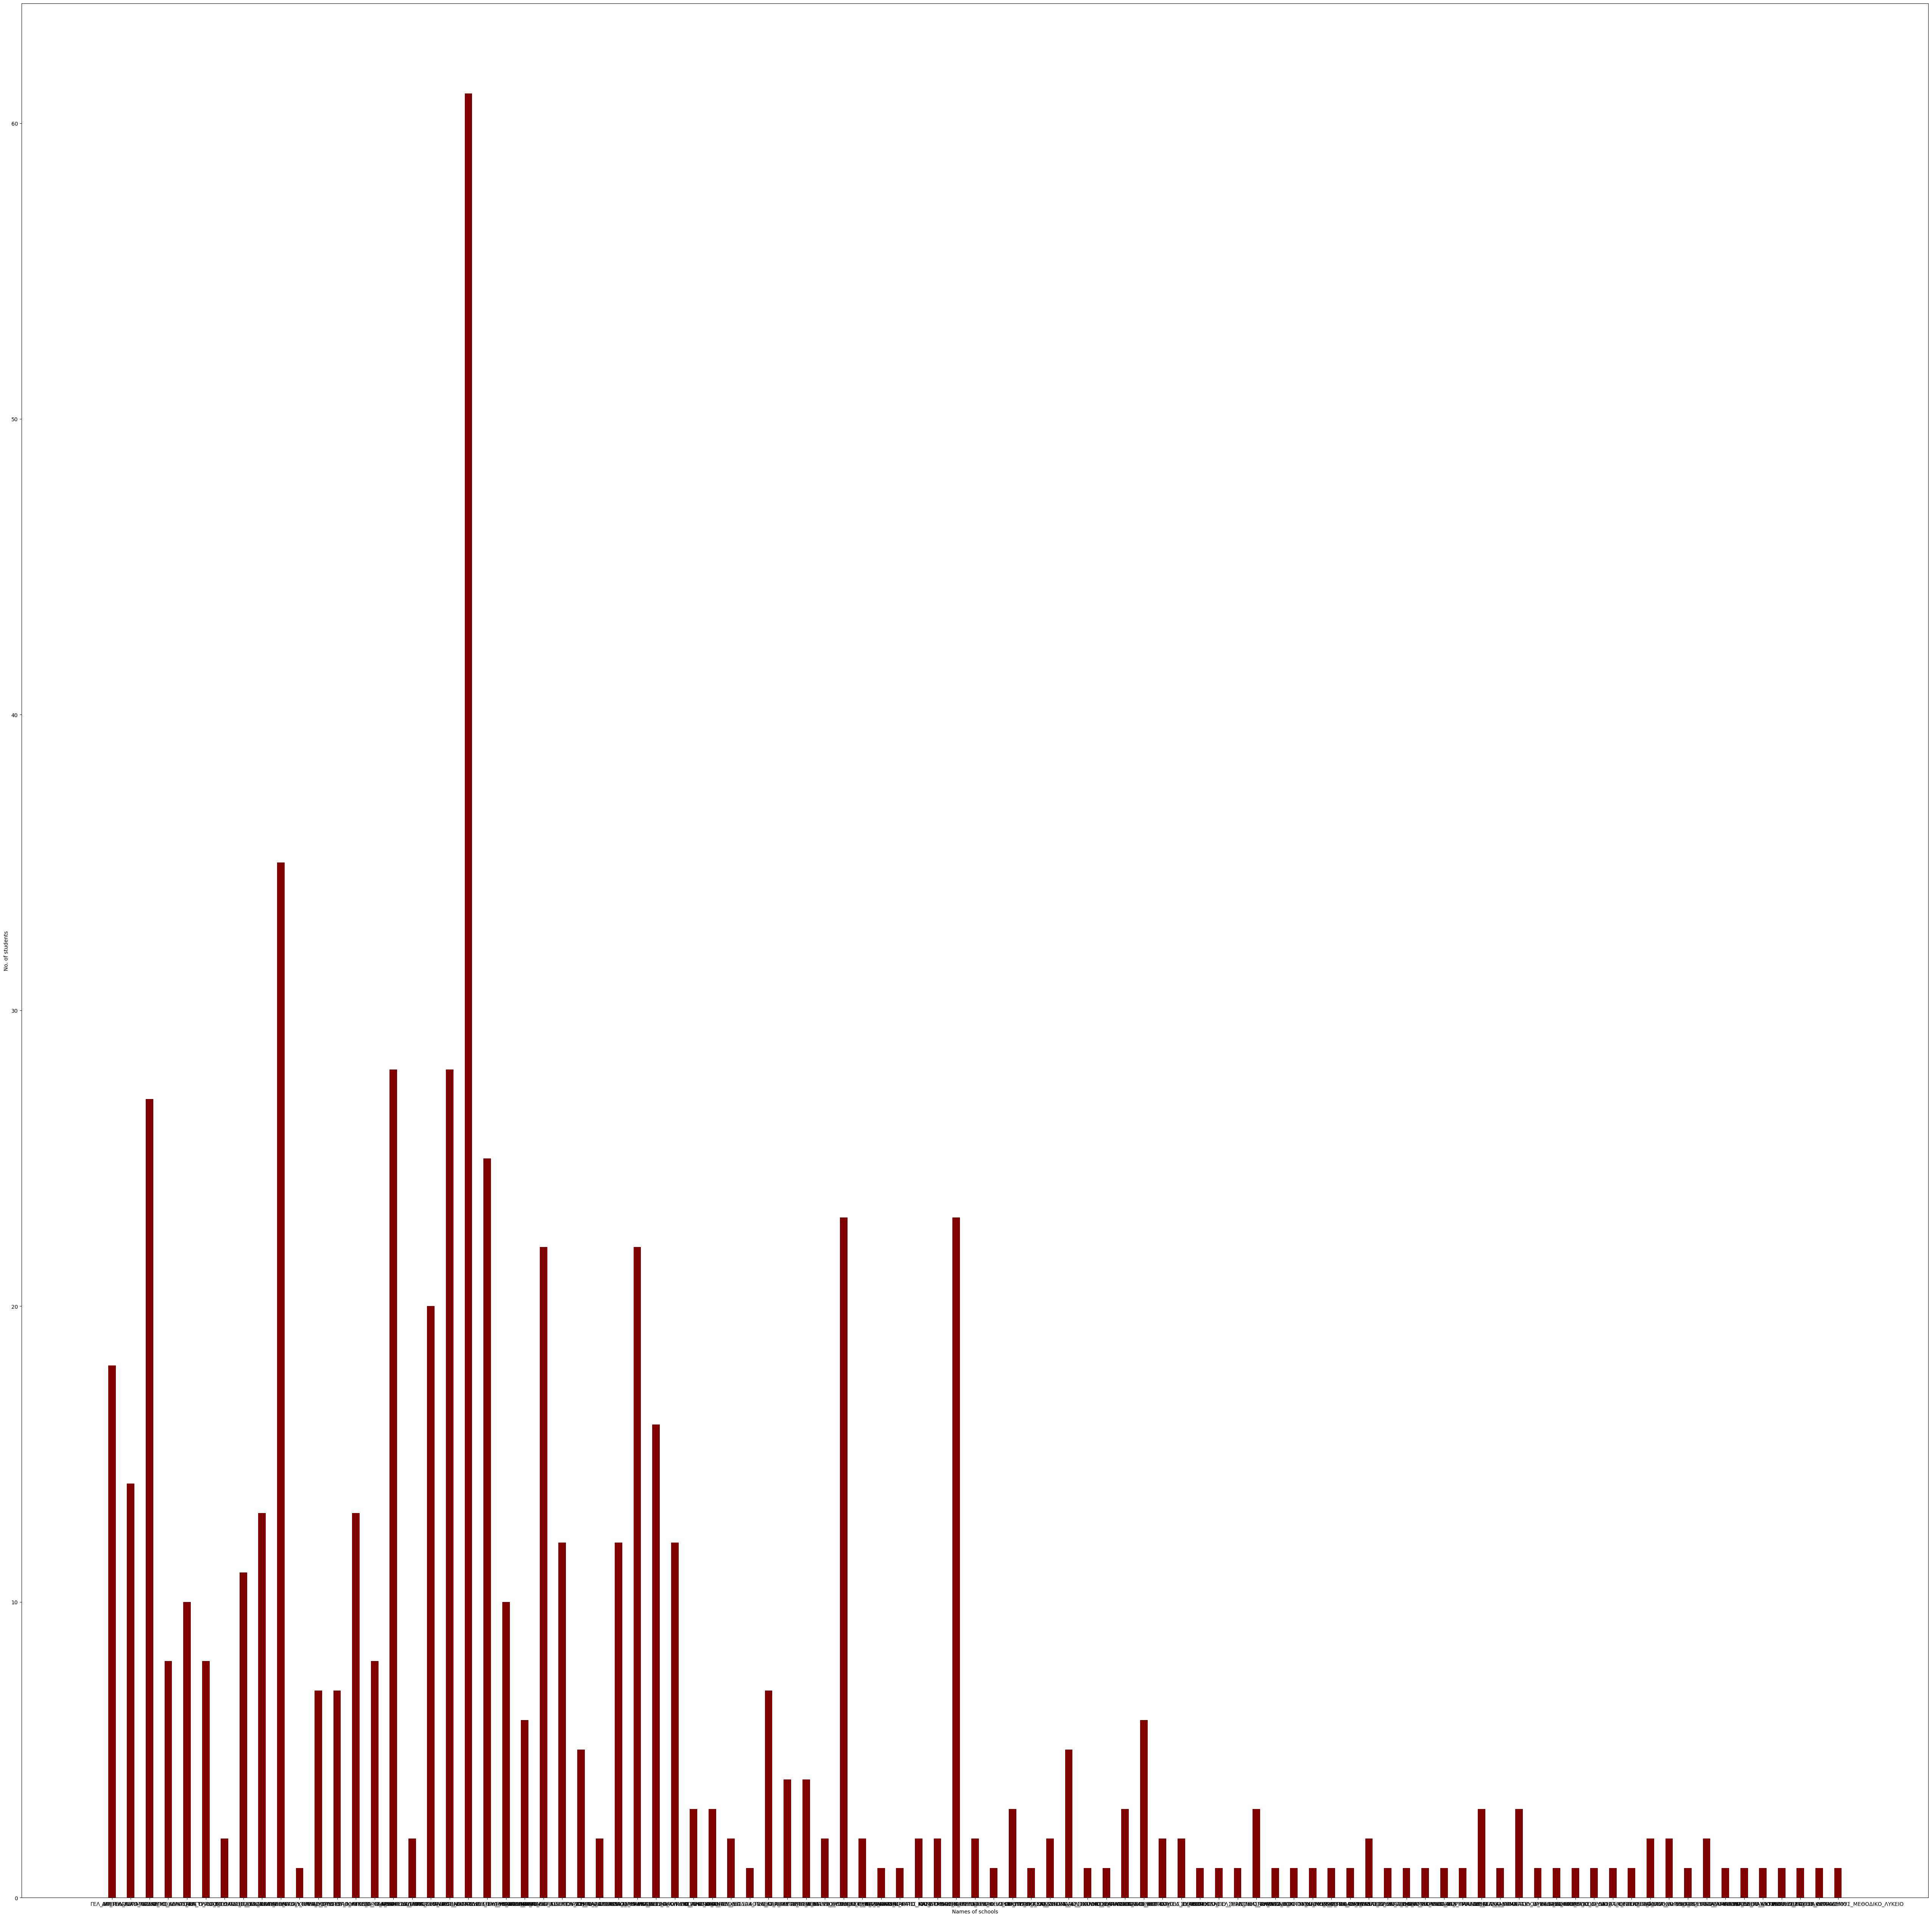

In [9]:
x=list(num_of_stud_in_each_clust2.keys())
y=list(num_of_stud_in_each_clust2.values())
fig = plt.figure(figsize = (65,65))
plt.bar(x, y, color ='maroon',width = 0.4)
plt.xlabel("Names of schools")
plt.ylabel("No. of students")
plt.show()


In [9]:
#convert dict into Data Frame
clustersDf = pd.DataFrame.from_dict(all_clusters, orient='index')
clustersDf = clustersDf.transpose()


clustersDf.to_excel('./clusters.xlsx', index=False)



